In [158]:
import jittor as jt
from jittor.optim import Optimizer
from jittor import Module
import random
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [159]:
def data_gen(w,b,num_examples):
    X=jt.normal(0,1,(num_examples,1))
    y=X*w+b
    y+=jt.normal(0,0.5,y.shape)
    return X,y.reshape((-1,1))

true_w=4.5
true_b=3
features,labels=data_gen(true_w,true_b,1000)

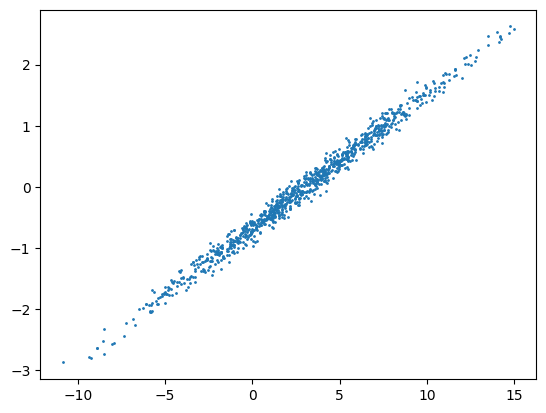

In [160]:
plt.scatter(labels,features,1)

In [161]:
def data_iter(batch_size,features,labels):
    num_examples=len(features)
    indices=list(range(num_examples-300))
    for i in range(0,num_examples-300,batch_size):
        batch_indices=jt.array(indices[i:min(i+batch_size,num_examples-300)])
        yield features[batch_indices],labels[batch_indices]

def data_valid(batch_size,features,labels):
    indices=list(range(len(features)-300,len(features)))
    for i in range(0,len(features)-700,batch_size):
        batch_indices=jt.array(indices[i:min(i+batch_size,len(features))])
        yield features[batch_indices],labels[batch_indices]

In [162]:
batch_size=10
for X,y in data_iter(batch_size,features,labels):
    print(X,'\n',y)
    break

for X_v,y_v in data_valid(batch_size,features,labels):
    print(X_v,'\n',y_v)
    break

jt.Var([[-1.1404634 ]
        [-1.6887717 ]
        [-0.61736923]
        [-0.30889538]
        [ 0.23076354]
        [-0.21233061]
        [ 0.64354485]
        [ 0.5360769 ]
        [-1.1177293 ]
        [ 0.09676252]], dtype=float32) 
 jt.Var([[-2.387966  ]
        [-5.7374997 ]
        [-0.08160594]
        [ 1.2219307 ]
        [ 3.7164218 ]
        [ 1.4101174 ]
        [ 6.1595287 ]
        [ 5.3925967 ]
        [-1.4562435 ]
        [ 3.668683  ]], dtype=float32)
jt.Var([[ 0.92490876]
        [ 0.9288419 ]
        [ 0.7947629 ]
        [ 0.4180048 ]
        [-1.3930305 ]
        [ 0.19272342]
        [ 0.9851784 ]
        [-0.06940585]
        [-0.08872447]
        [-0.38221368]], dtype=float32) 
 jt.Var([[ 7.250523 ]
        [ 7.563329 ]
        [ 6.5981746]
        [ 5.017308 ]
        [-2.6998236]
        [ 3.809952 ]
        [ 7.947534 ]
        [ 2.2692916]
        [ 2.3877666]
        [ 1.6859437]], dtype=float32)


In [163]:
class Mymodel(Module):
    def __init__(self):
        super().__init__()
        self.w=jt.rand(1)
        self.b=jt.rand(1)
    def execute(self,x):
        y_hat=self.b+x*self.w 
        return y_hat

In [164]:
model=Mymodel()
loss_function=jt.nn.MSELoss()
lr=0.1
optimizer=jt.nn.SGD(model.parameters(),lr,momentum=0.3)

In [165]:
def train(model,x_train,y_train,loss,opt):
    model.train()
    y_hat=model(x_train)
    l=loss(y_train,y_hat)
    optimizer.step(l)
    return l

def val(model,x_val,y_val,loss_function):
    model.eval()
    y_pred=model(x_val)
    loss=loss_function(y_val,y_pred)
    return loss


Before Training: 
 {'w': jt.Var([0.33339652], dtype=float32), 'b': jt.Var([0.38306478], dtype=float32)}
epoch  0  avg training loss:  jt.Var([7.7977915], dtype=float32)
epoch  10  avg training loss:  jt.Var([0.22997057], dtype=float32)
epoch  20  avg training loss:  jt.Var([0.22997057], dtype=float32)
epoch  30  avg training loss:  jt.Var([0.22997057], dtype=float32)
epoch  40  avg training loss:  jt.Var([0.22997057], dtype=float32)
epoch  50  avg training loss:  jt.Var([0.22997057], dtype=float32)
epoch  60  avg training loss:  jt.Var([0.22997057], dtype=float32)
epoch  70  avg training loss:  jt.Var([0.22997057], dtype=float32)
epoch  80  avg training loss:  jt.Var([0.22997057], dtype=float32)
epoch  90  avg training loss:  jt.Var([0.22997057], dtype=float32)
Now Validity...
epoch  0  avg validation loss:  jt.Var([0.24278577], dtype=float32)
epoch  10  avg validation loss:  jt.Var([0.24278577], dtype=float32)
epoch  20  avg validation loss:  jt.Var([0.24278577], dtype=float32)
epoch 

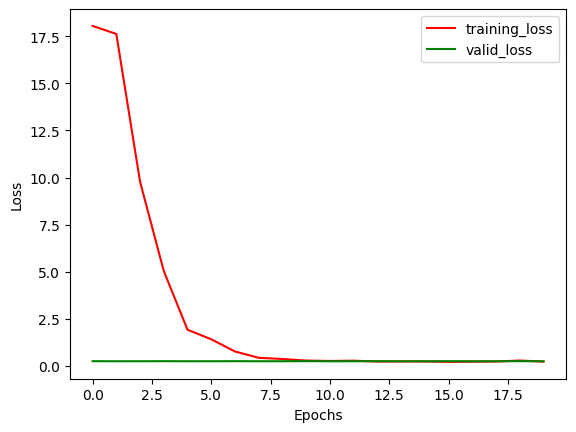

In [166]:
print("Before Training: \n",model.state_dict())
epochs=100
train_loss_list=[]
val_loss_list=[]
batch_size=100

for epoch in range(epochs):
    epoch_train_loss=0
    count=0
    for X,y in data_iter(batch_size,features,labels):
        train_loss=train(model,X,y,loss_function,optimizer)
        epoch_train_loss+=train_loss
        count+=1
        train_loss_list.append(train_loss)
    if epoch%10==0:
        print("epoch ",epoch," avg training loss: ",epoch_train_loss/count)

print("Now Validity...")

for epoch in range(epochs):
    epoch_val_loss=0
    count=0
    for X,y in data_valid(batch_size,features,labels):
        valid_loss=val(model,X,y,loss_function)
        val_loss_list.append(valid_loss)
        epoch_val_loss+=valid_loss
        count+=1
    if epoch%10==0:
        print("epoch ",epoch," avg validation loss: ",epoch_val_loss/count)
    

plt.plot(train_loss_list[:20],'r',label="training_loss")
plt.plot(val_loss_list[:20],'g',label="valid_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()